# Sklearn

# Визуализация данных

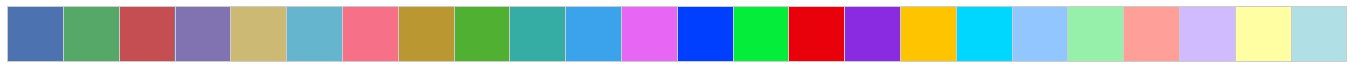

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from contextlib import contextmanager

sns.set()
sns.set_style("whitegrid")

color_palette = sns.color_palette('deep') + sns.color_palette('husl', 6) + sns.color_palette('bright') + sns.color_palette('pastel')

%matplotlib inline
sns.palplot(color_palette)

def ndprint(a, precision=3):
    with np.printoptions(precision=precision, suppress=True):
        print(a)

In [2]:
from sklearn import datasets, metrics, model_selection as mdsel

### Загрузка выборки

In [3]:
digits  =  datasets.load_digits()

In [ ]:
print(digits.DESCR)

In [5]:
print('target:', digits.target[0])
print('features: \n', digits.data[0])
print('number of features:', len(digits.data[0]))

target: 0
features: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
number of features: 64


## Визуализация объектов выборки

In [ ]:
#не будет работать: Invalid dimensions for image data
plt.imshow(digits.data[0])

In [7]:
digits.data[0].shape

(64,)

In [8]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
digits.data[0].reshape(8,8).shape

(8, 8)

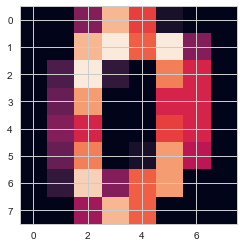

In [10]:
plt.imshow(digits.data[0].reshape(8,8))

In [11]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [12]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

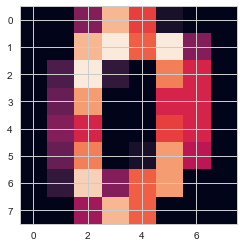

In [13]:
plt.imshow(digits.images[0])

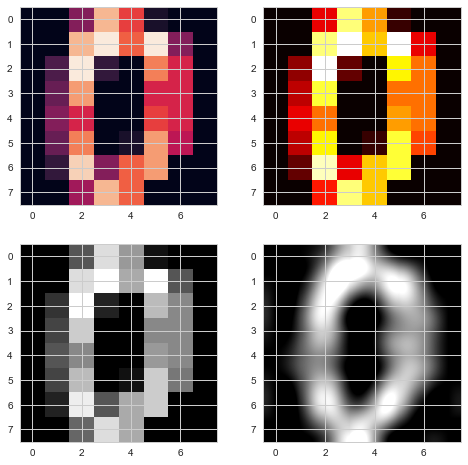

In [54]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(digits.images[0])

plt.subplot(2, 2, 2)
plt.imshow(digits.images[0], cmap='hot')

plt.subplot(2, 2, 3)
plt.imshow(digits.images[0], cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(digits.images[0], cmap='gray', interpolation='sinc')

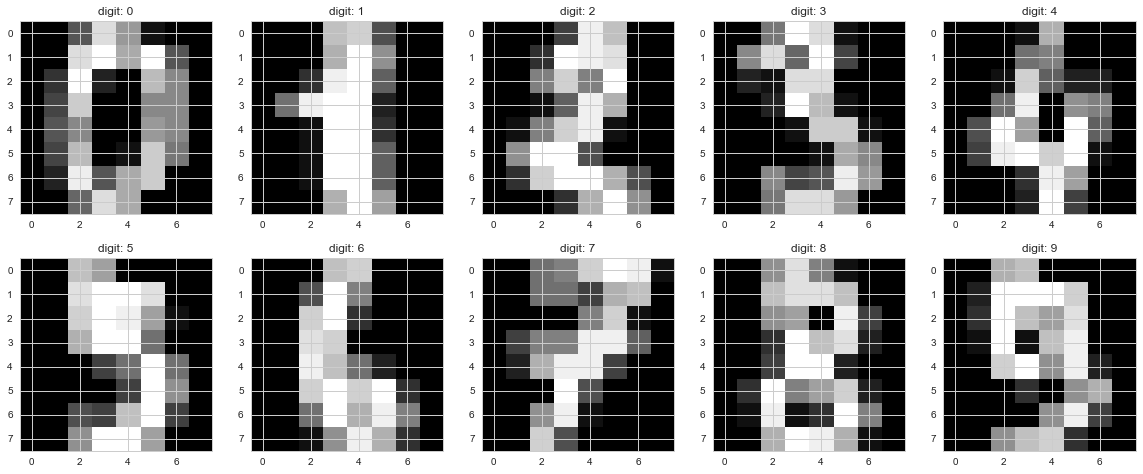

In [17]:
plt.figure(figsize=(20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    plt.subplot(2, 5, plot_number + 1)
    plt.imshow(plot, cmap = 'gray')
    plt.title('digit: ' + str(digits.target[plot_number]))

## Уменьшение размерности

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import Counter

In [19]:
data = digits.data[:1000]
labels = digits.target[:1000]

In [20]:
print(Counter(labels))

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<BarContainer object of 10 artists>

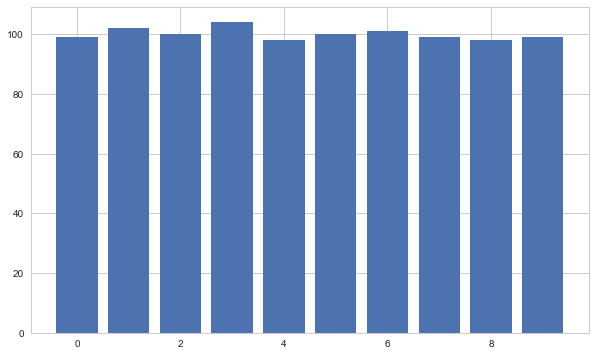

In [21]:
plt.figure(figsize = (10, 6))
plt.bar(Counter(labels).keys(), Counter(labels).values())

In [22]:
classifier = KNeighborsClassifier()

In [23]:
classifier.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
print(classification_report(classifier.predict(data), labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.97      0.99       105
           2       1.00      1.00      1.00       100
           3       1.00      0.98      0.99       106
           4       1.00      1.00      1.00        98
           5       0.99      1.00      0.99        99
           6       1.00      1.00      1.00       101
           7       0.99      0.99      0.99        99
           8       0.97      0.99      0.98        96
           9       0.96      0.98      0.97        97

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



### Random projection

In [25]:
from sklearn import random_projection

In [26]:
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
data_2d_rp = projection.fit_transform(data)

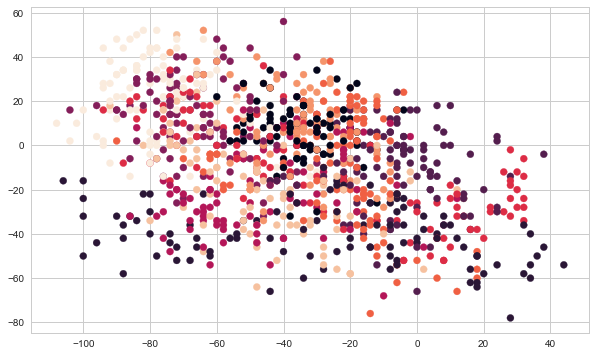

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels)

In [57]:
classifier.fit(data_2d_rp, labels)
print(classification_report(classifier.predict(data_2d_rp), labels))

              precision    recall  f1-score   support

           0       0.74      0.47      0.58       154
           1       0.75      0.58      0.65       131
           2       0.67      0.59      0.63       113
           3       0.71      0.51      0.60       144
           4       0.38      0.56      0.45        66
           5       0.42      0.53      0.47        79
           6       0.52      0.57      0.55        93
           7       0.35      0.51      0.42        69
           8       0.37      0.58      0.45        62
           9       0.62      0.69      0.65        89

   micro avg       0.55      0.55      0.55      1000
   macro avg       0.55      0.56      0.54      1000
weighted avg       0.60      0.55      0.56      1000



### PCA

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components = 2, random_state = 0, svd_solver='randomized')
data_2d_pca = pca.fit_transform(data)

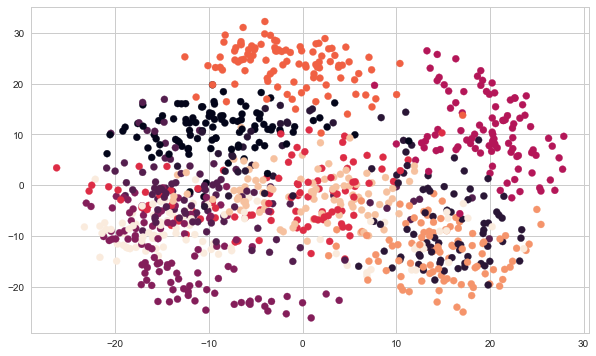

In [60]:
plt.figure(figsize = (10, 6))
plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)

In [61]:
classifier.fit(data_2d_pca, labels)
print(classification_report(classifier.predict(data_2d_pca), labels))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       113
           1       0.56      0.54      0.55       105
           2       0.59      0.57      0.58       104
           3       0.77      0.79      0.78       101
           4       0.95      0.93      0.94       100
           5       0.56      0.54      0.55       104
           6       0.92      0.93      0.93       100
           7       0.76      0.71      0.74       105
           8       0.62      0.66      0.64        92
           9       0.52      0.67      0.58        76

   micro avg       0.71      0.71      0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



### MDS

In [36]:
from sklearn import manifold

In [37]:
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data)

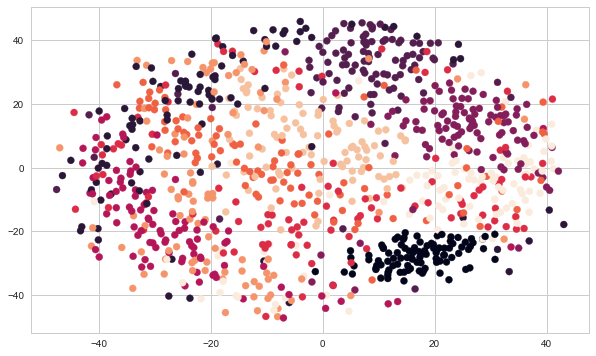

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = labels)

In [39]:
classifier.fit(data_2d_mds, labels)
print(classification_report(classifier.predict(data_2d_mds), labels))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       113
           1       0.65      0.62      0.63       106
           2       0.86      0.80      0.83       108
           3       0.85      0.81      0.83       108
           4       0.80      0.64      0.71       122
           5       0.49      0.54      0.52        90
           6       0.60      0.60      0.60       102
           7       0.48      0.68      0.56        71
           8       0.67      0.72      0.69        92
           9       0.59      0.66      0.62        88

   micro avg       0.70      0.70      0.70      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.72      0.70      0.70      1000



### t- SNE

In [40]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

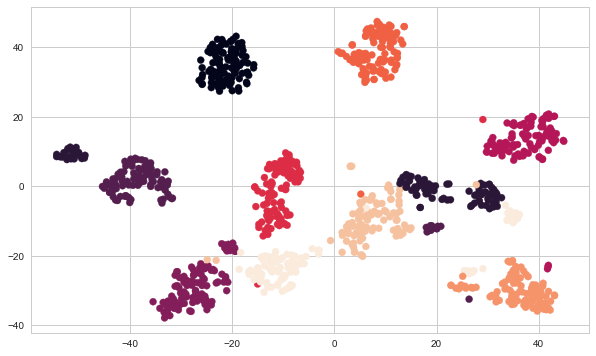

In [41]:
plt.figure(figsize = (10, 6))
plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

In [42]:
classifier.fit(data_2d_tsne, labels)
print(classification_report(classifier.predict(data_2d_tsne), labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.98      0.99       104
           2       0.99      1.00      0.99        99
           3       1.00      0.97      0.99       107
           4       1.00      0.99      0.99        99
           5       0.98      1.00      0.99        98
           6       0.99      1.00      1.00       100
           7       0.99      0.99      0.99        99
           8       0.96      0.98      0.97        96
           9       0.98      0.98      0.98        99

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

